In [53]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting._matplotlib import scatter_matrix

In [54]:
df = pd.read_csv('/Users/yelderiny/Projects/Dissertation/Data/project-data.csv', index_col=[0])

In [55]:
df.head()

,id,name,language,pull_requests,size,contributors,age,contributor_xp,pr_points
0,4311796,adam-p/markdown-here,JavaScript,18,16027,11,2331,1.261,4.0623
0,54346799,public-apis/public-apis,Python,1867,5088,428,2186,4.242,12.2630
0,126577260,trekhleb/javascript-algorithms,JavaScript,119,13363,191,1843,1.683,9.9500
0,231283452,excalidraw/excalidraw,TypeScript,3239,46904,267,1493,6.030,46.3520
0,163883279,nektos/act,Go,853,9617,172,1860,4.373,15.4270


In [56]:
df.describe()

,id,pull_requests,size,contributors,age,contributor_xp,pr_points
count,1.148000e+03,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000
mean,7.977635e+07,281.219512,11084.486934,102.951220,2181.592334,3.320919,10.885294
std,9.602197e+07,495.592304,12010.650785,110.493942,1195.837214,1.933005,9.607152
min,4.070600e+04,1.000000,21.000000,1.000000,0.000000,0.500000,0.800000
25%,1.434542e+07,37.000000,2011.000000,25.000000,1237.750000,1.957500,4.559500
50%,4.684078e+07,114.000000,6085.500000,60.000000,2114.500000,2.849000,8.030000
75%,1.124286e+08,303.500000,16674.250000,136.000000,3010.250000,4.142250,13.935750
max,7.087751e+08,6322.000000,49843.000000,479.000000,5444.000000,13.140000,80.084000


In [57]:
df.isna().sum()

id                0
name              0
language          0
pull_requests     0
size              0
contributors      0
age               0
contributor_xp    0
pr_points         0
dtype: int64

In [58]:
correlations = df.drop(columns=['id', 'name', 'language'], axis=1)
correlations.corr(method='pearson')

,pull_requests,size,contributors,age,contributor_xp,pr_points
pull_requests,1.000000,0.283175,0.660123,0.251607,0.535806,0.707057
size,0.283175,1.000000,0.281727,-0.036381,0.208169,0.150710
contributors,0.660123,0.281727,1.000000,0.292774,0.700061,0.547290
age,0.251607,-0.036381,0.292774,1.000000,0.284199,0.228193
contributor_xp,0.535806,0.208169,0.700061,0.284199,1.000000,0.462621
pr_points,0.707057,0.150710,0.547290,0.228193,0.462621,1.000000


TypeError: suptitle() missing 1 required positional argument: 't'

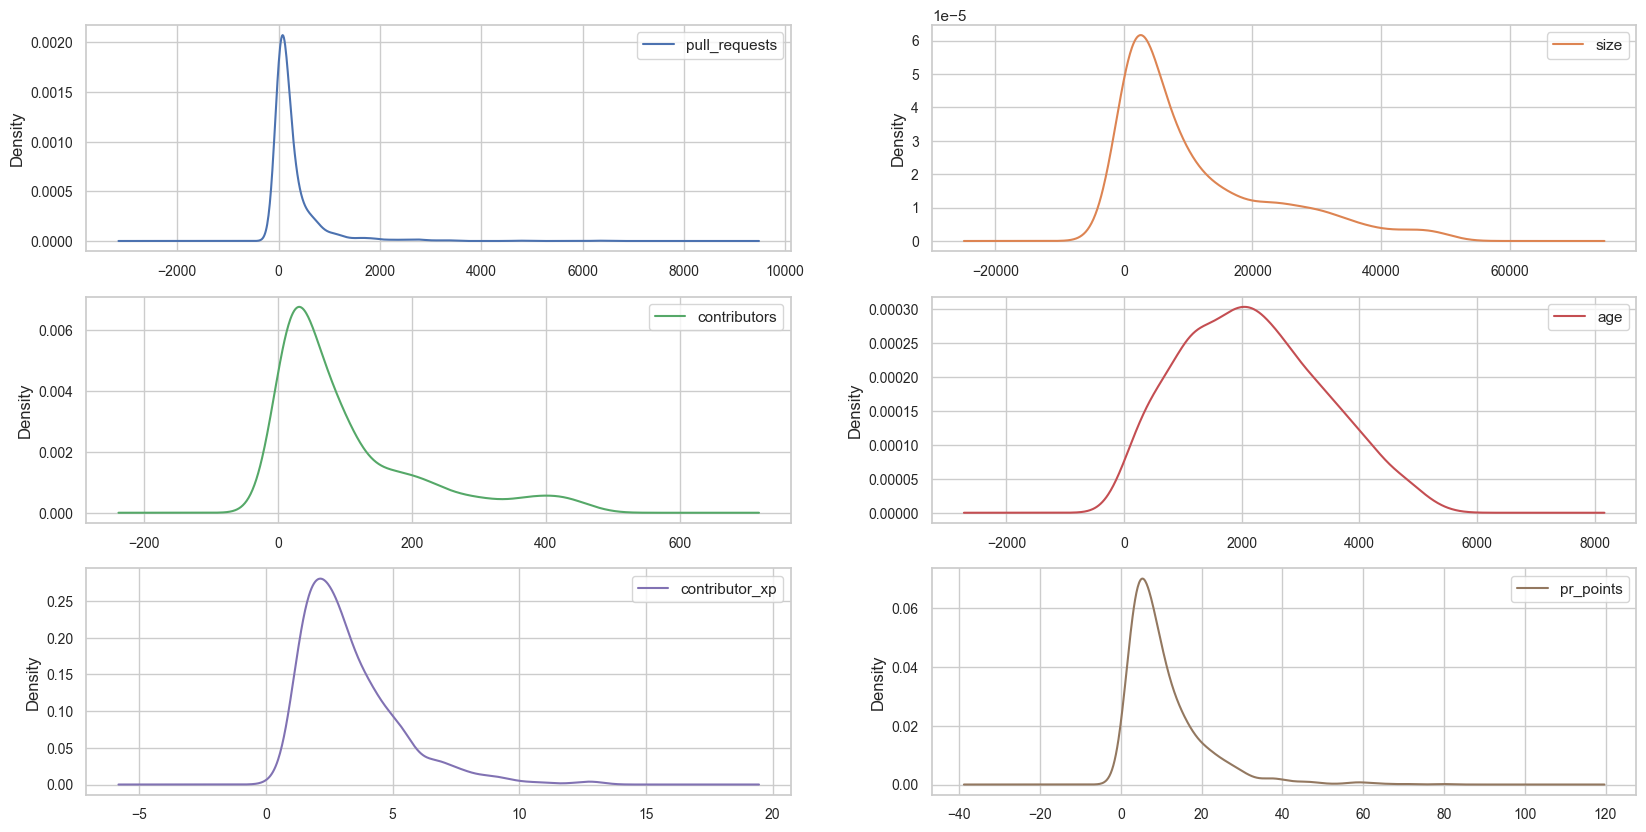

In [59]:
correlations.plot(kind='density', subplots=True, layout=(3,2), fontsize=10, sharex=False, figsize=(20,10))
plt.suptitle(y=1.00, fontweight='bold', fontsize=30)
plt.show()

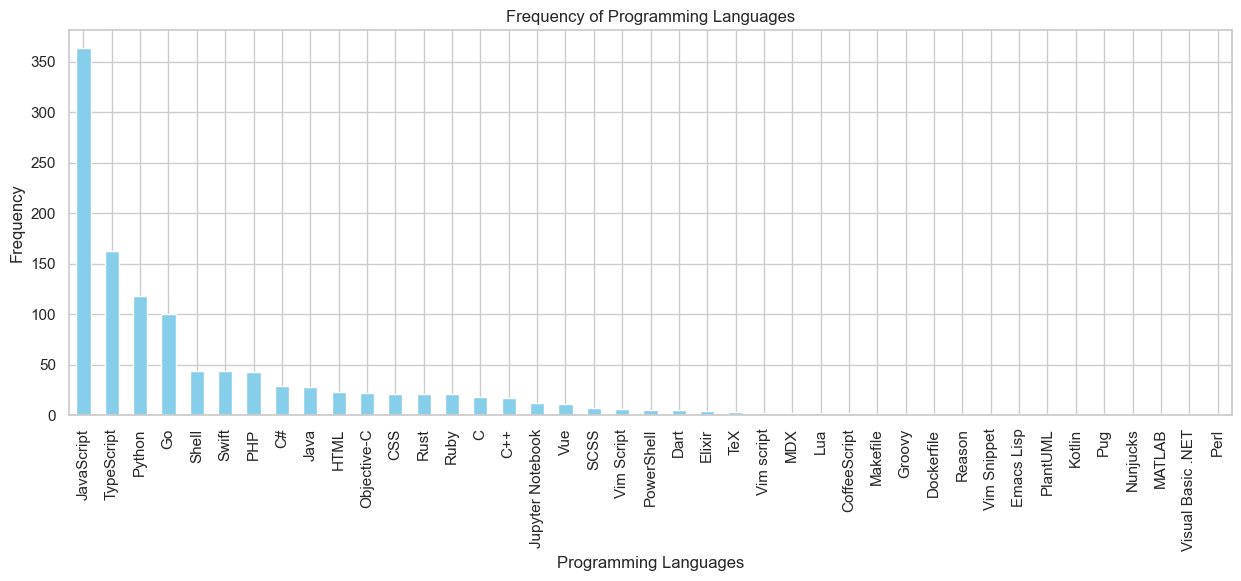

In [71]:
language_counts = df['language'].value_counts()
plt.figure(figsize=(15, 5))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Programming Languages')
plt.xlabel('Programming Languages')
plt.ylabel('Frequency')
plt.show()

TypeError: suptitle() missing 1 required positional argument: 't'

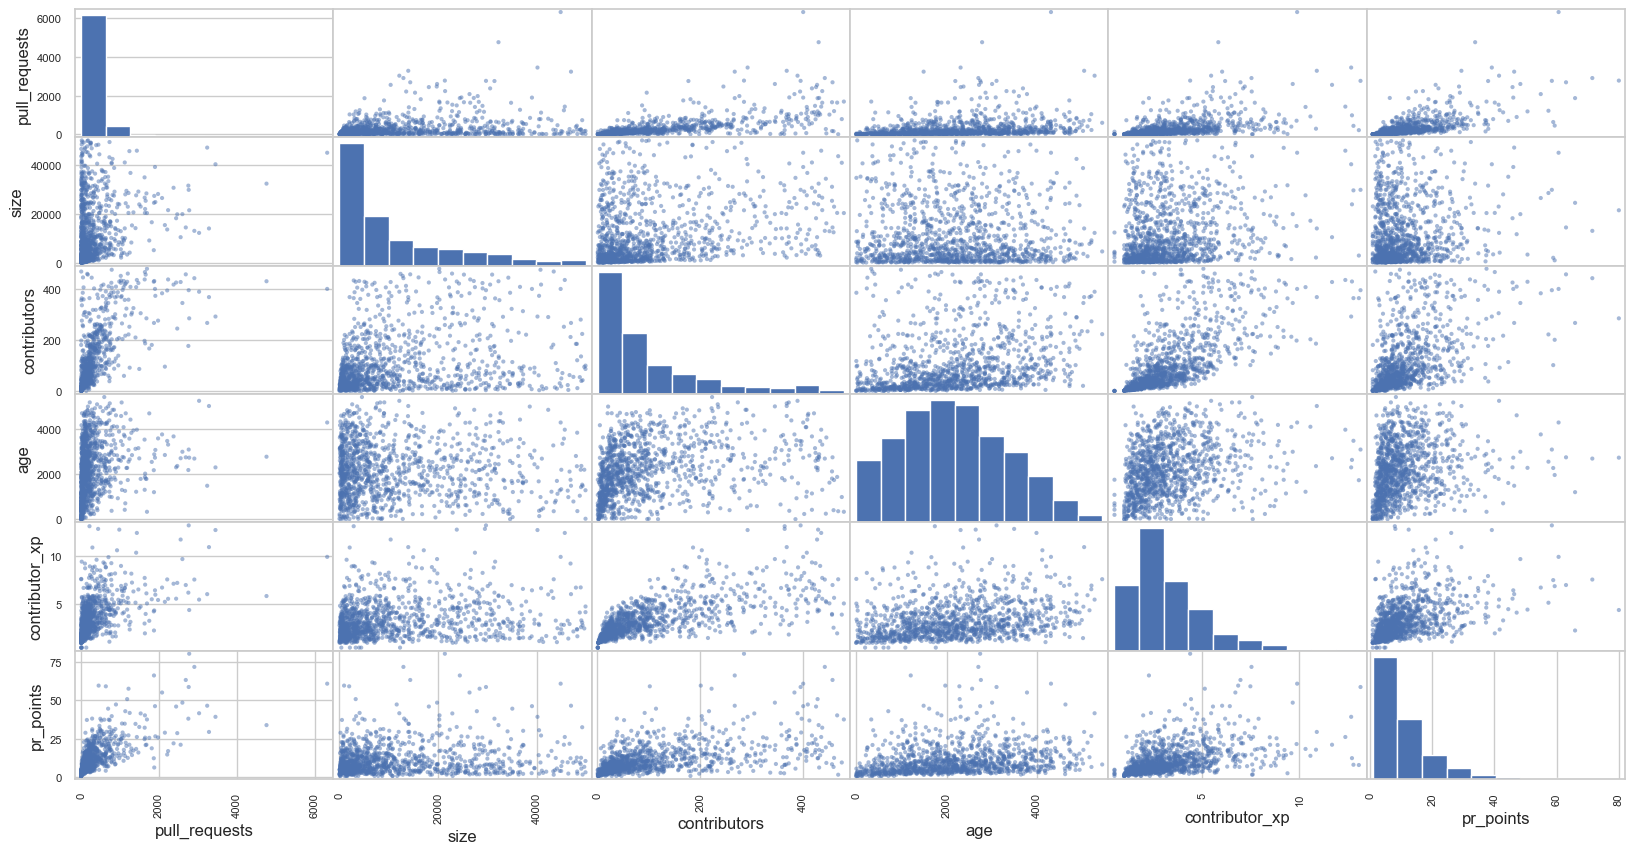

In [65]:
axes = scatter_matrix(correlations, figsize=(20, 10))

plt.suptitle(y=1.00, fontweight='bold', fontsize=20)
plt.rcParams['axes.labelsize'] = 15

# Set tick label size for both x and y axes
for ax in axes.flatten():
    ax.tick_params(axis='both', labelsize=10)

plt.show()

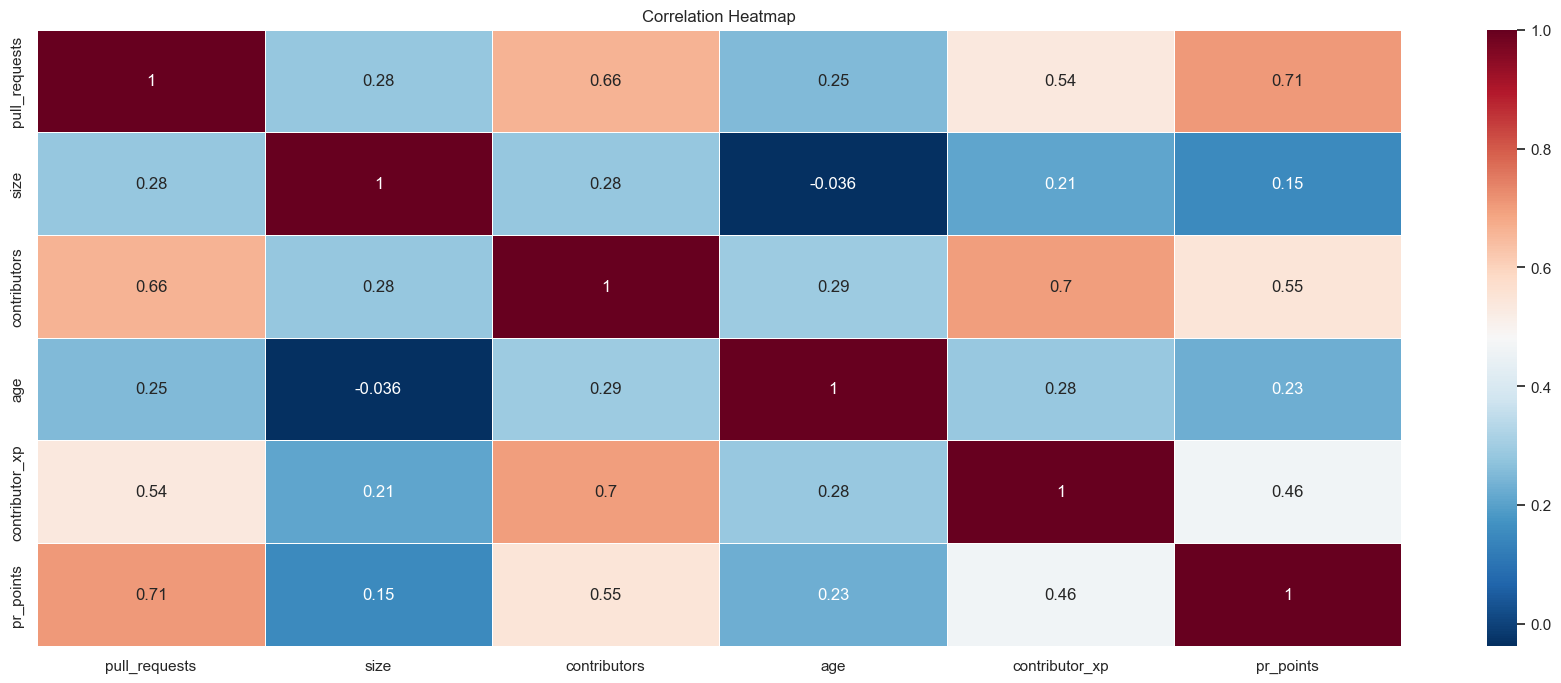

In [62]:
sns.set(style="whitegrid")
plt.figure(figsize=(22, 8))
sns.heatmap(correlations.corr(), annot=True, cmap="RdBu_r", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

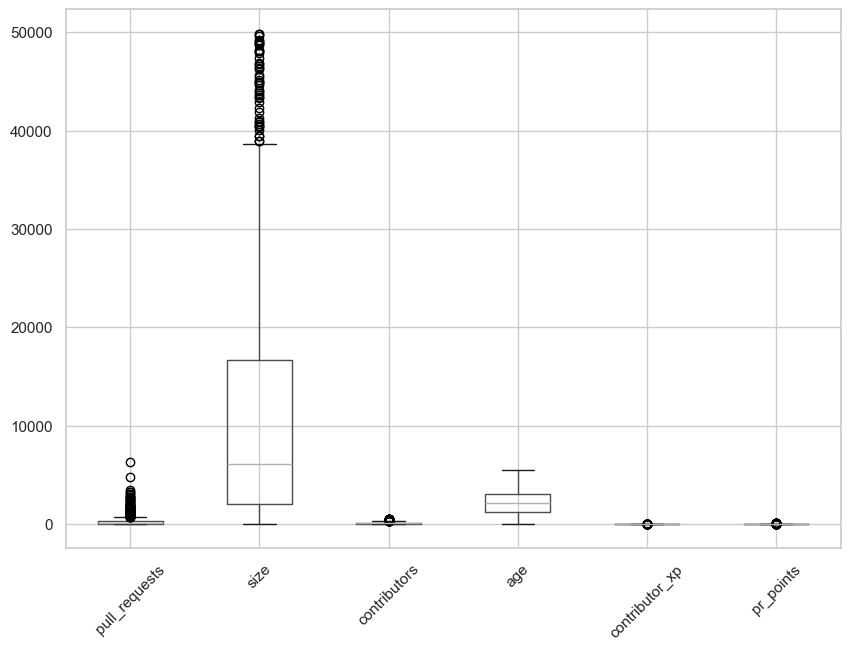

In [63]:
correlations.boxplot(figsize=(10, 7), rot=45)
plt.show()